In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

In [3]:
df = pd.read_csv('Credit Card Defaulter.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [5]:
df.drop(['ID'], axis=1, inplace= True)

In [6]:
df['default'] = df['default'].replace({'Y': 1, 'N': 0})

In [7]:
df['PAY_0'] = df['PAY_0'].astype('object')
df['PAY_2'] = df['PAY_2'].astype('object')
df['PAY_3'] = df['PAY_3'].astype('object')
df['PAY_4'] = df['PAY_4'].astype('object')
df['PAY_5'] = df['PAY_5'].astype('object')
df['PAY_6'] = df['PAY_6'].astype('object')
#df['default'] = df['default'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

In [9]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [10]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [11]:
#df['PAY_1'] = df['PAY_0'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)
#df['PAY_2'] = df['PAY_2'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)
#df['PAY_3'] = df['PAY_3'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)
#df['PAY_4'] = df['PAY_4'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)
#df['PAY_5'] = df['PAY_5'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)
#df['PAY_6'] = df['PAY_6'].replace({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10},)

# EDA

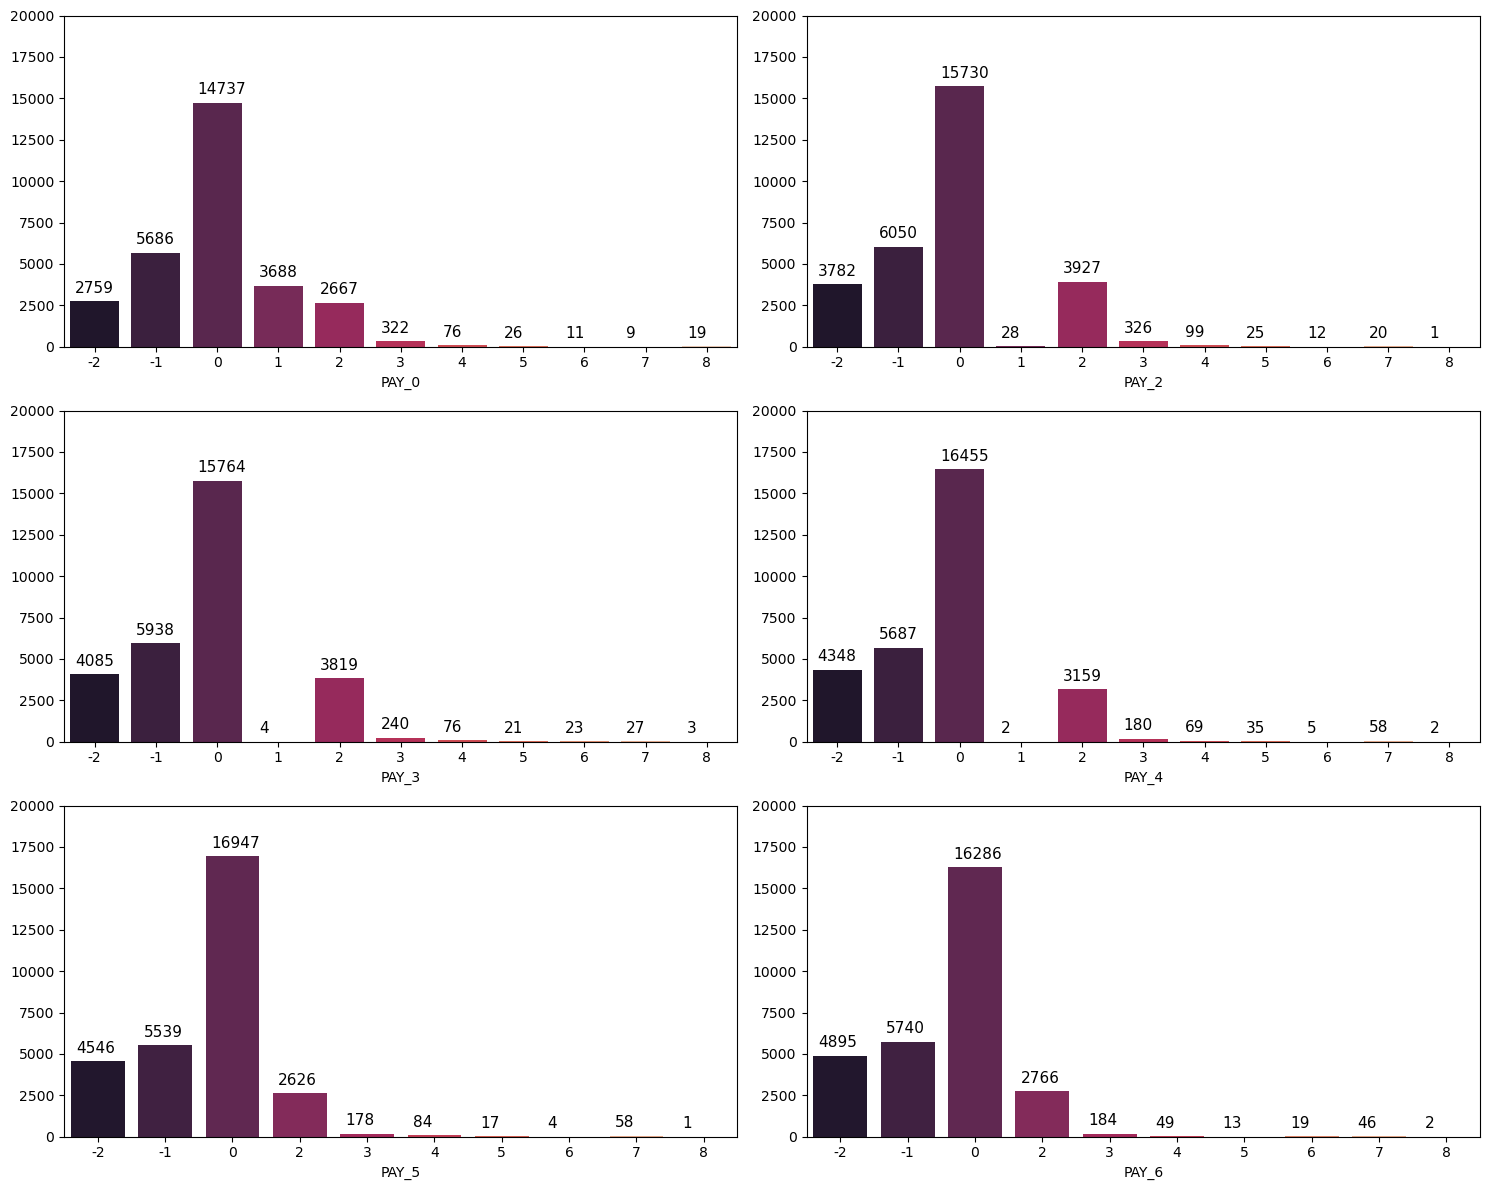

In [12]:
pay_x_fts = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

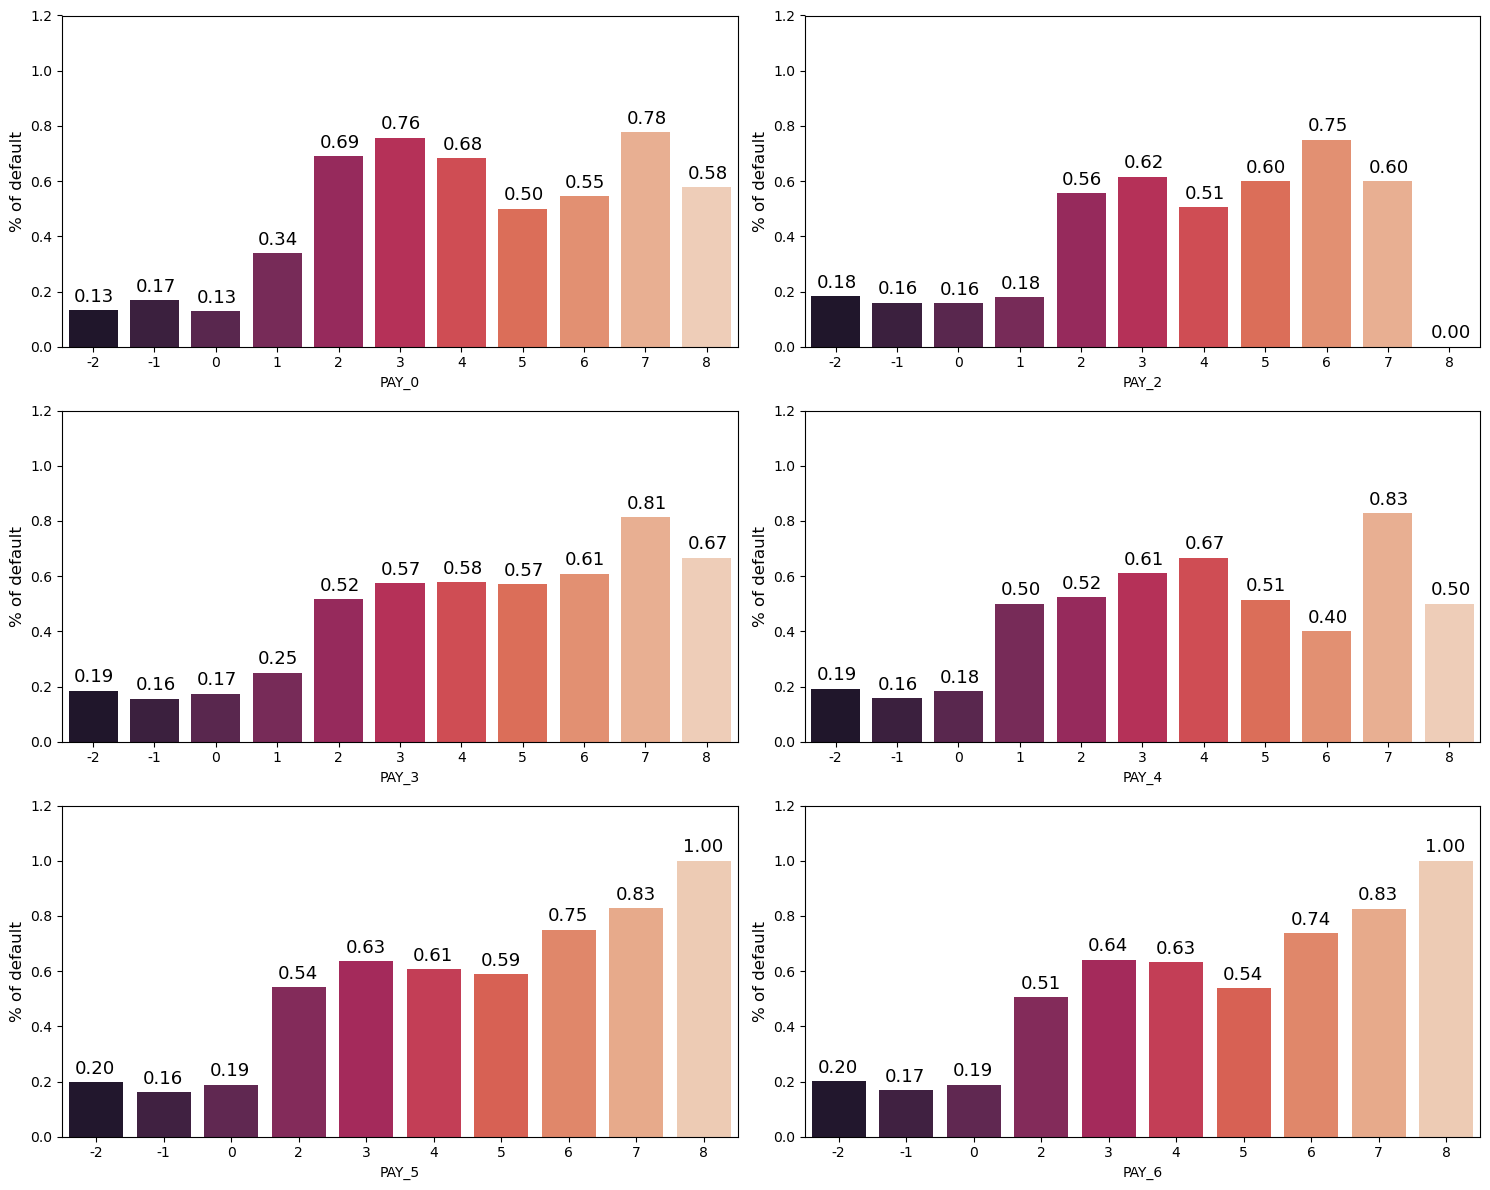

In [13]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

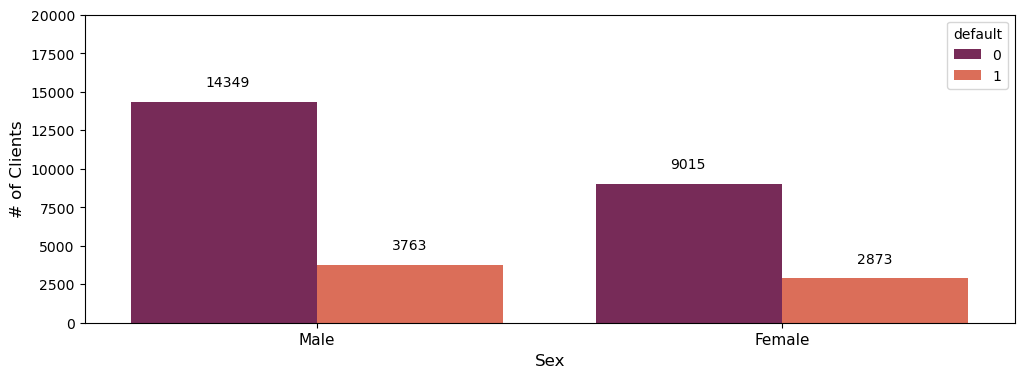

In [14]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="default", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

In [15]:
#Proportion of female default is higher

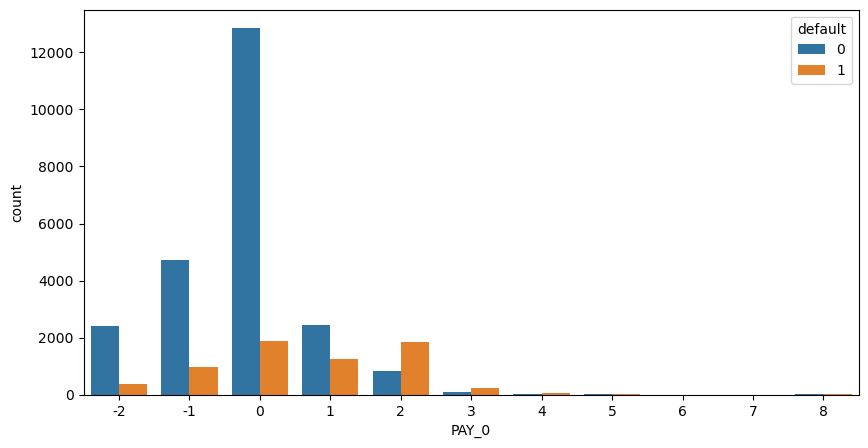

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'PAY_0', hue = 'default', data = df);

# Checking for Multicollinearity 

In [17]:
df_num = df[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
             'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]

In [18]:
#X_train_ols = sm.add_constant(df_num)
df_num_vif = sm.add_constant(df_num)

In [19]:
vif = pd.DataFrame()
vif['Feature'] = df_num_vif.columns
vif['VIF'] = [variance_inflation_factor(df_num_vif.values, i) for i in range(df_num_vif.shape[1])]

# Print the VIF values
print(vif)

      Feature        VIF
0       const  16.462977
1   LIMIT_BAL   1.230768
2         AGE   1.022211
3   BILL_AMT1  13.914295
4   BILL_AMT2  25.760114
5   BILL_AMT3  21.727446
6   BILL_AMT4  20.247252
7   BILL_AMT5  24.886076
8   BILL_AMT6  14.927201
9    PAY_AMT1   1.691400
10   PAY_AMT2   2.222764
11   PAY_AMT3   1.735050
12   PAY_AMT4   1.629473
13   PAY_AMT5   1.678846
14   PAY_AMT6   1.169004


In [20]:
df_num = df[['LIMIT_BAL','AGE','BILL_AMT2','BILL_AMT4','BILL_AMT6',
             'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]
df_num_vif = sm.add_constant(df_num)

In [21]:
vif = pd.DataFrame()
vif['Feature'] = df_num_vif.columns
vif['VIF'] = [variance_inflation_factor(df_num_vif.values, i) for i in range(df_num_vif.shape[1])]

# Print the VIF values
print(vif)

      Feature        VIF
0       const  16.461220
1   LIMIT_BAL   1.222509
2         AGE   1.022074
3   BILL_AMT2   6.035605
4   BILL_AMT4  11.431831
5   BILL_AMT6   7.495998
6    PAY_AMT1   1.277885
7    PAY_AMT2   1.243594
8    PAY_AMT3   1.364046
9    PAY_AMT4   1.279651
10   PAY_AMT5   1.325928
11   PAY_AMT6   1.150932


# Processing Dataset

In [22]:
X = df.drop(['BILL_AMT1','BILL_AMT3','BILL_AMT5','default'], axis=1)
y = df['default']
X.shape

(30000, 20)

In [23]:
def scale_encode_data(df):
    df_num = df.select_dtypes(include="number")
    df_cat = df.select_dtypes(include="object")
    
    mmscaler = MinMaxScaler()
    df_num_rescaled = pd.DataFrame(mmscaler.fit_transform(df_num), columns=df_num.columns)
    
    OHE = OneHotEncoder(drop='first')
    df_cat_ohe = pd.DataFrame(OHE.fit_transform(df_cat).toarray(), columns=OHE.get_feature_names_out())
    
    df_num.reset_index(drop=True, inplace=True)
    df_cat_ohe.reset_index(drop=True, inplace=True)
    df_enc = pd.concat([df_num, df_cat_ohe], axis = 1)
    
    return df_enc

In [24]:
X = scale_encode_data(X)
X.shape

(30000, 78)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((24000, 78), (6000, 78))

# Logistic Regression

In [29]:
X_train.shape, X_test.shape

((24000, 78), (6000, 78))

In [30]:
#X_train_log = sm.add_constant(X_train)

In [31]:
#logmodel = sm.Logit(y_train,X_train_log)
#results = logmodel.fit(maxiter=10000)

In [37]:
y_train.value_counts()

0    18661
1     5339
Name: default, dtype: int64

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.7838333333333334

In [40]:
X_train.shape

(24000, 78)

In [42]:
from sklearn.feature_selection import RFECV
clf = LogisticRegression(random_state=42)
rfecv = RFECV(estimator=clf, cv=5)
rfecv.fit(X_train, y_train)
print("Optimal number of features: ", rfecv.n_features_)

Optimal number of features:  26


In [43]:
selected_features = [X.columns[i] for i in range(len(X.columns)) if rfecv.support_[i]]
print("Selected features: ", selected_features)

Selected features:  ['EDUCATION_Graduate school', 'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University', 'EDUCATION_Unknown', 'MARRIAGE_Married', 'MARRIAGE_Other', 'MARRIAGE_Single', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_2_0', 'PAY_2_2', 'PAY_2_3', 'PAY_3_2', 'PAY_3_3', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_5_2', 'PAY_5_3', 'PAY_5_7', 'PAY_6_0', 'PAY_6_3']


In [44]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

In [45]:
model = LogisticRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.8275

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4493  210]
 [ 825  472]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.69      0.36      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



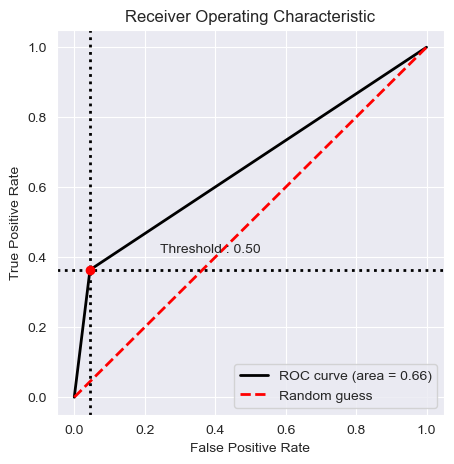

In [47]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# DecisionTree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.8271666666666667

# XgBoost

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.821

In [ ]:
Xgboost - Feature Selection

In [81]:
from sklearn.feature_selection import RFECV
clf = XGBClassifier(random_state=42)
rfecv = RFECV(estimator=clf, cv=3)
rfecv.fit(X_train, y_train)
print("Optimal number of features: ", rfecv.n_features_)

Optimal number of features:  8


In [82]:
selected_features = [X.columns[i] for i in range(len(X.columns)) if rfecv.support_[i]]
print("Selected features: ", selected_features)

Selected features:  ['PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_2_2', 'PAY_2_3', 'PAY_3_2', 'PAY_4_2', 'PAY_5_2']


In [83]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)
xgb = XGBClassifier()
xgb.fit(X_train_selected, y_train)
y_pred = xgb.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.8256666666666667

In [85]:
param_grid = {
    'max_depth': randint(3, 10),                      # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.2),               # Learning rate
    'subsample': uniform(0.6, 0.4),                    # Fraction of samples used in each tree
    'colsample_bytree': uniform(0.6, 0.4),             # Fraction of features used in each tree
    'gamma': uniform(0, 0.5),                          # Regularization parameter
    'min_child_weight': randint(1, 6)                  # Minimum sum of instance weight needed in a child
}

In [86]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_selected, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'colsample_bytree': 0.6693458614031088, 'gamma': 0.1955303037866204, 'learning_rate': 0.04644721755761247, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.7700623497964979}
Best Score: 0.8177083333333334


In [87]:
best_xgb = XGBClassifier(**random_search.best_params_)
best_xgb.fit(X_train_selected, y_train)
y_pred = best_xgb.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.8266666666666667

In [89]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4468  235]
 [ 805  492]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4703
           1       0.68      0.38      0.49      1297

    accuracy                           0.83      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



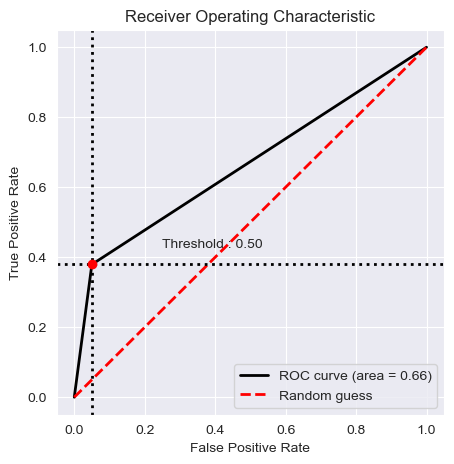

In [90]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()